I) Deep Learning
## 1. Implement the following operations (forward and backward pass)
    (a) Matrix multiplication layer W X
    (b) Bias addition layer
    (c) Mean squared loss layer
    (d) Soft max layer
    (e) Sigmoid layer
    (f) Cross entropy loss layer

In [ ]:
# Importing libraries and important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# The value of Eta to be used while updating weights using gradient descent
eta= 1.0/10**7

class matrixMultiplicationLayer:
    def __init__(self, nueronsCnt, featuresCnt):
        self.X = np.array([])
        self.weights = np.array([[0 for j in range(nueronsCnt)] for i in range(featuresCnt)])
    
    def forwardPass(self, X):
        self.X = X
        
        # Computing N = XW
        return np.dot(self.X, self.weights)
    
    def backwardPass(self, out_grad):
      
        # Computing dL/dw
        WGrad = np.dot(self.X.T,out_grad)
        
        # Computing dL/dx
        XGrad = np.dot(out_grad, self.weights.T)
        
        # Updating weights using Gradient descent
        self.weights = self.weights - eta*WGrad
        
        return XGrad

In [ ]:
class biasLayer:
    def __init__(self,nueronsCnt):
        self.N = np.array([])
        self.B = np.array([[0 for i in range(nueronsCnt)]])
  
    def forwardPass(self,N):
        self.N = N
        
        # Computing P = XW + B = N + B
        return self.N + self.B
    
    def backwardPass(self,out_grad):

        # Computing dL/dB
        biasGrad = out_grad.sum(axis=0)
        
        # Updating B using Gradient descent
        self.B = self.B - eta*biasGrad
        
        return out_grad                     

In [ ]:
class meanSquaredLossLayer:
    def forwardPass(self, P ,Y):

        # Loss = Sum_i[ ( P_i - Y_i )^2 ]  = (P-Y)^t(P-Y)
        loss = np.dot((P - Y).T,(P - Y))
        return loss
    
    def backwardPass(self, P, Y):
      
        # Computing dL/dP 
        lossGrad = 2*(P-Y)       
        return lossGrad

In [ ]:
class softmaxLayer:

    def forwardPass(self, P):
      out = np.exp(P)
      for s in range(len(out)):
        out[s] /= np.sum(out[s])
      return out

    def backwardPass(self, P, Y, W, X):
        
        # Instantitating the crossEntropyLossLayer & doing the backward pass.
        cLayer = crossEntropyLossLayer()
        outGrad = cLayer.backwardPass(P, Y, W, X)

        # Instantitating the softmax layer & doing the forward pass.
        sLayer = softmaxLayer()
        out = sLayer.forwardPass(P)
       
        # Initialising the derivatives.
        n = np.size(out)
        dL_dB = np.zeros(O)
        dL_dP = np.zeros((D, O))
        dE_dP = np.dot((np.identity(n) - np.transpose(out)) * out, outGrad).T

        # Computing the gradients dL/dB and dL/dP & returning them.
        for sample in range(len(out)):
            for d in range(D):
                dL_dP[d] += X[sample][d] * dE_dP[0]

        dL_dB += dE_dP[0]

        return (dL_dP, dL_dB)

In [ ]:
class sigmoidLayer:
    
    def forwardPass(self,z):
      # a = sigmoid(z)
      a = 1/(1 + np.exp(-z))
      return a

    # da/dz
    def backwardPass(self,a,z):
        return a*(1-a)

In [ ]:
class crossEntropyLossLayer:

    def forwardPass(self, P, Y):

        # Instantitating the softmax layer & doing the forward pass.
        sLayer = softmaxLayer()
        sOutput = sLayer.forwardPass(P)

        # Computing & returning the loss.
        loss = np.dot ( Y, np.log(sOutput) )
        return loss

    def backwardPass(self, P, Y, W, X):
        
        # Instantitating the softmax layer & doing the forward pass.
        sLayer = softmaxLayer()
        sOutput = sLayer.forwardPass(P)

         # Computing & returning the output gradients.
        outGrad = -np.multiply(np.array(Y), np.reciprocal(sOutput)) 
        outGrad = outGrad + np.multiply(1 - np.array(Y), np.reciprocal(1 - sOutput)) 
        return np.transpose(outGrad)
          

## 2. Using the sklearn.load boston() function, obtain boston house pricing dataset.
Train a regression model using the operations implemented above. You need to
write a stochastic gradient descent function to train.

In [ ]:
# Reading the dataset.
X,Y = datasets.load_boston(return_X_y=True)

# Changing the type of Y to ease the computation.
Y = np.array([[i] for i in Y])

# Splitting the data into training & testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [ ]:
# Function that trains a regression model using stochastic gradient descent.
def trainUsingSGD( X,Y,iterCounter):
    
    # Creating a matrix multiplication layer with just one nueron.
    mMLayer = matrixMultiplicationLayer(1,len(X[0]))
    
    # Creating a bias & loss layer corresponding to it.
    bLayer   = biasLayer(1)
    lLayer   = meanSquaredLossLayer()

    lossStore = []

    for _ in range(iterCounter):
        for j in range(len(X)):

            # Current data point.
            x = np.array([X[j]])
            y = Y[j]

            # Making the forward passes corresponding to the three layers consecutively.
            N = mMLayer.forwardPass(x)
            P = bLayer.forwardPass(N)
            L = lLayer.forwardPass(P, y)
            
            # Making the backward passes corresponding to the three layers consecutively.
            dL_dP = lLayer.backwardPass(P, y)
            dL_dN = bLayer.backwardPass(dL_dP)
            dl_dX = mMLayer.backwardPass(dL_dN)

        N = mMLayer.forwardPass(X)
        P = bLayer.forwardPass(N)
        currLoss = lLayer.forwardPass(P,Y)
        lossStore.append(currLoss[0][0])

    # Returning the weights 
    W = mMLayer.weights
    B = bLayer.B
    return (W, B, lossStore)   

In [ ]:
# Now, let's train the model.
W, B, lossStore = trainUsingSGD(X_train,Y_train,100*len(X_train))        

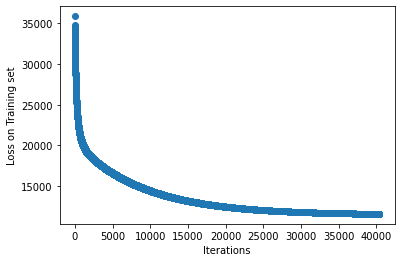

In [ ]:
plt.scatter(range(len(lossStore)),lossStore)
plt.xlabel("Iterations")
plt.ylabel("Loss on Training set")
plt.show()

In [ ]:
W,B

(array([[-1.11905301e-01],
        [ 6.85504599e-02],
        [-1.49979793e-02],
        [ 4.99657006e-01],
        [ 2.39760652e-01],
        [ 5.06719577e+00],
        [ 1.10295673e-04],
        [-9.90561951e-01],
        [ 2.22164130e-01],
        [-9.87519835e-03],
        [-2.43903049e-01],
        [ 1.94691199e-02],
        [-4.33478257e-01]]), array([[0.61786848]]))

#### Checking the Model performance on test data

In [ ]:
# Making the prediction on the test data.
P = np.dot(X_test, W) + B
Y = Y_test

# Computing the mean squared error
loss = np.dot((P - Y).T,(P - Y))
print(loss/len(X_test))

[[25.84829629]]


## 3. Load the iris dataset in sklearn. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. Using the operations implemented above create a multi-class classifier (Cross entropy loss + soft max)

In [ ]:
# Loading the dataset and making a dataframe.
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Scaling the dataframe.
iris_df = (iris_df - iris_df.min()) / (iris_df.max() - iris_df.min())

# Making the type column and doing encoding & then dropping the temporary columns.
iris_df['type'] = iris.target
iris_df = pd.get_dummies(iris_df, columns = ['type'])
iris_df['type'] = iris_df[['type_0', 'type_1', 'type_2']].values.tolist()
iris_df.drop( ['type_0', 'type_1', 'type_2'], axis = 1, inplace = True )

# Examining the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,0.222222,0.625000,0.067797,0.041667,"[1, 0, 0]"
1,0.166667,0.416667,0.067797,0.041667,"[1, 0, 0]"
2,0.111111,0.500000,0.050847,0.041667,"[1, 0, 0]"
3,0.083333,0.458333,0.084746,0.041667,"[1, 0, 0]"
4,0.194444,0.666667,0.067797,0.041667,"[1, 0, 0]"


In [ ]:
# Renaming the columns for ease of computation.
iris_df.columns = range(0,5)

# Examining the dataset
iris_df.head()

,0,1,2,3,4
0,0.222222,0.625000,0.067797,0.041667,"[1, 0, 0]"
1,0.166667,0.416667,0.067797,0.041667,"[1, 0, 0]"
2,0.111111,0.500000,0.050847,0.041667,"[1, 0, 0]"
3,0.083333,0.458333,0.084746,0.041667,"[1, 0, 0]"
4,0.194444,0.666667,0.067797,0.041667,"[1, 0, 0]"


In [ ]:
# Number of samples.
N = iris_df.shape[0] 

# Number of features
D = iris_df.shape[1] - 1

# Number of output classes/types.
O = 3  

# Making X,Y  using the dataset.
X = np.ones((N, D))
for i in range(N):
    for j in range(D):
      X[i][j] = iris_df[j][i]
Y = np.array(iris_df[4])

# Splitting the data into training & testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

train_cnt = len(X_train)
test_cnt = len(X_test)

In [ ]:
class trainMultiClassClassifier:
    def __init__(self, X, W, B, eta, Y):
        self.X = X
        self.W = W
        self.B = B
        self.eta = eta
        self.Y = Y

    def forwardPass(self):

        # Doing the matrix multiplocation & bias addition directly.
        N = np.dot( self.X, self.W )
        P = N + self.B

        # Instantiating the softmax Layer & doing the forward pass.
        sLayer = softmaxLayer()
        P = sLayer.forwardPass(P)

        # Once the forward pass is done, we are calling the backward pass.
        return self.backwardPass(P)
        
    def backwardPass(self, P):

        # Instantiating the softmax Layer & doing the backward pass.
        sLayer = softmaxLayer()
        gradP, gradB = sLayer.backwardPass(P, self.Y, self.W, self.X)

        # Updating the W & B
        self.W = self.W - self.eta * gradP / 2
        self.B = self.B - self.eta * gradB / 2

        return (self.W, self.B)

In [ ]:
# Randomly initialising the W & B.
W = np.array([[np.random.rand() for i in range(O)] for j in range(D)])
B = [np.random.rand() for j in range(O)]

# Training the classifier for "train_cnt*100" number of iterations.
idx = 0
for itr_cnt in range(train_cnt * 1000):
    classifier = trainMultiClassClassifier([X_train[idx]], W, B, 0.01, Y_train[idx])
    W, B = classifier.forwardPass()
    idx = (idx + 1) % train_cnt     

#### Testing the performance of the classifier.

In [ ]:
correct_cnt = 0
for cur_sample in range(len(X_test)):
    
    # Make the prediction on the current sample.
    probabilities = ( np.dot ( X_test[cur_sample], W ) + B ) 
    pred = np.argmax(probabilities)
    
    # If the prediction is correct, increment the counter.
    if Y_test[cur_sample][pred] == 1:
        correct_cnt += 1
  
print("The percentage of the samples classified correctly is: ", (correct_cnt/test_cnt)*100,"%" )

The percentage of the samples classified correctly is:  96.66666666666667 %


## Observations of Q1-3:
- In Q2, As the plot shows, the loss on training set is decreasing with increase in the number of iterations. The loss on testing data is not too optimal. But it can be reduced even by a large extent by training the model for more iterations. ( We tried training for even more iterations, but due to excess amount of time taken for computing, we stopped in the middle & trained for a fewer number of iterations. )
- In Q3, The percentage of the samples classified correctly is around `85-97`%

#### References:
- https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7